Parcial 1 - Santiago Julio Dávila - 1000413445

Los siguientes datos fueron extraidos de los datos para la cuarta ola de infecciones por millon de habitantes (IPMH) de Colombia por la variante Omicrón del Coronavirus

A) Genere un data frame de pandas y agregé una nueva columna de IPMH con una incertidubre del 2‰ aleatoria. Es decir, a cada IPMH sumarle o restarle un número aleatoria en el rango de su 2‰

B) Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine (para la columna con incertidumbre)

    1. La velocidad inicial de IPMH en IPMH/día
    2. La aceleración constante en IPMH/día**2
    3. El número máximo de IPMH que se alcanzaría
    4. El número de días en el que se alcanzaría dicho máximo
    5. Realice una gráfico que muestré el ajuste y la posición del máximo usando los estándares adecuados

DATOS


    {'día':1,'IPMH':464},
    {'día':2,'IPMH':494},
    {'día':3,'IPMH':532},
    {'día':4,'IPMH':552},
    {'día':5,'IPMH':576},
    {'día':6,'IPMH':589}




In [1]:
# Librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import interpolate

Solución punto A.

In [14]:
# Diccionario con los días y su respectivo IPMH.

IPMH={'día':[i for i in range(1,7)],'IPMH':[464,494,532,552,576,589]}
df=pd.DataFrame(IPMH)
df

,día,IPMH
0,1,464
1,2,494
2,3,532
3,4,552
4,5,576
5,6,589


In [12]:
# Agrega la columna con una incertidumbre aleatoria no mayor del 2‰.

np.random.seed(1)   # Si desea quitar la semilla para generar valores nuevos cada vez, comente esta línea.
inc=lambda x:0.002*x     # Define una función para calcular la incertidumbre del 2‰ de un valor.

# Sobre la columna IPMH, suma un valor aleatorio en el rango (-0.002n,0.002n).
df['IPMH±2‰']=df.IPMH.apply(lambda n:n+np.random.uniform(-inc(n),inc(n)))   

In [13]:
df

,día,IPMH,IPMH±2‰
0,1,464,463.845993
1,2,494,494.435361
2,3,532,530.936243
3,4,552,551.563550
4,5,576,575.186126
5,6,589,588.039550


Solución punto B.

Para interpretarlo como un problema de 'caída libre' —o, en general, movimiento acelerado—, es necesario tener en cuenta que se debe llegar a una ecuación de la forma:

$$y=y_0+v_0t+\frac{1}{2}at^2$$

Donde los coeficientes $y_0$, $v_0$ y $\frac{1}{2}a$ serán definidos por el ajuste hecho con `np.polyfit`.

In [31]:
# Define el polinomio de ajuste de grado 2 (caída libre) a partir de los coeficientes dados por np.polyfit.

coef=np.polyfit(df.día,df.IPMH,2)
pol=np.poly1d(coef,variable='t')
print(pol)

        2
-2.518 t + 43.08 t + 421.9


1. La velocidad está dada por la primera derivada de la posición $v=\dfrac{\mathrm d y}{\mathrm d t}$, calculada con el método `deriv` de los polinomios de numpy. 

In [43]:
# Derivada de la posición para obtener la velocidad.

v=pol.deriv()
v=np.poly1d(v.coef,variable='t')
print(v)

 
-5.036 t + 43.08


La velocidad inicial está dada por $v_0=v(0)$.

In [48]:
# Evalúa la velocidad en t=0 para obtener la velocidad inicial.

v0=v(0)
print(f'Velocidad inicial v_0 = {v0} IPMH/día')

Velocidad inicial v_0 = 43.082142857142955 IPMH/día


2. La aceleración constante está dada por la segunda derivada de la posición $a=\dfrac{\mathrm d^2 y}{\mathrm d t^2}$ o la derivada de la velocidad $a=\dfrac{\mathrm d v}{\mathrm d t}$. Se utilizará la segunda.

In [47]:
# Derivada de la velocidad para obtener la aceleración.

a=v.deriv()
print(f'Aceleración constante a = {a} IPMH/día²')

Aceleración constante a =  
-5.036 IPMH/día²


4. Para calcular el tiempo (número de días) en que se alcanza el máximo de IPMH se debe optimizar la función $y$, para lo cual se encuentra el cero de su derivada, es decir, $v(t_{\mathrm{máx}})=0$, este valor corresponde al máximo ya que la segunda derivada es negativa para todo $t$. Se hace este punto primero, pues para el punto 3. es necesario conocer el valor de esta optimización.

In [51]:
# Solución de la ecuación v0+at=0 usando el método de Newton.

tmax=optimize.newton(v,1)
print(f'Número de días en alcanzar el máximo t_máx={tmax} días')

Número de días en alcanzar el máximo t_máx=8.555319148936125 días


3. Para encontrar el IPMH máximo, es necesario evaluar el polinomio de ajuste en el valor de $t_{\mathrm{máx}}$, esto es, $\mathrm{IPMH_{máx}}=y(t_{\mathrm{máx}})$.

In [52]:
# Valor máximo del IPMH.

ymax=pol(tmax)
print(f'IPMH máximo = {ymax}')

IPMH máximo = 606.1907408814585


5. Gráfica.

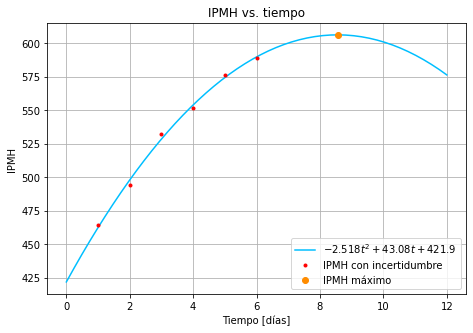

In [75]:
# Define un intervalo entre 0 y 12 días, y evalúa el polinomio de ajuste en dicho intervalo.

t=np.linspace(0,12)
y=pol(t)

# Crea la gráfica con todos los estándares.

plt.figure(figsize=(7.5,5))
plt.title('IPMH vs. tiempo')
plt.plot(t,y,'deepskyblue',label=r'$-2.518t^2+43.08t+421.9$')
plt.plot(df.día,df.IPMH,'r.',label='IPMH con incertidumbre')
plt.plot(tmax,ymax,'o',color='darkorange',label='IPMH máximo')
plt.xlabel('Tiempo [días]')
plt.ylabel('IPMH')
plt.grid()
plt.legend()
plt.show()